In [1]:
import pandas as pd
from pandas import np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### With device - cv score decreases

In [2]:
X_train = (pd.read_csv('data/train.csv', compression="gzip")
           .merge(pd.read_csv('data/device_train.csv', compression='gzip'), on='USER_ID', how='left'))

In [3]:
X_test = (pd.read_csv('data/test.csv', compression="gzip")
           .merge(pd.read_csv('data/device_test.csv', compression='gzip'), on='USER_ID', how='left'))

KeyboardInterrupt: 

In [ ]:
y_train = X_train.pop('target')

### Without Device

In [2]:
X_train = pd.read_csv('data/train.csv', compression="gzip").drop('USER_ID', axis=1)
X_test = pd.read_csv('data/test.csv', compression="gzip").drop('USER_ID', axis=1)

In [115]:
X_train = pd.read_csv('data/train_counts.csv', compression="gzip").drop('USER_ID', axis=1)
X_test = pd.read_csv('data/test_counts.csv', compression="gzip").drop('USER_ID', axis=1)

test_user = X_test.pop('USER_ID')

In [107]:
y_train = X_train.pop('target')

In [108]:
X_train.shape, X_test.shape, y_train.shape

((11529, 2026), (11676, 2026), (11529,))

In [89]:
X_train.head()

,ON_SITE_SEARCH_TERM_124,PAGE_222,PAGE_1304,PAGE_405,CONTENT_CATEGORY_BOTTOM_11,PAGE_1256,PAGE_835,PAGE_1405,CONTENT_CATEGORY_BOTTOM_41,PAGE_43,...,PAGE_1290,ON_SITE_SEARCH_TERM_59,PAGE_346,PAGE_398,PAGE_1504,PAGE_646,PAGE_1456,PAGE_712,PAGE_667,PAGE_1334
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,9,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,18,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_test.head()

,ON_SITE_SEARCH_TERM_124,PAGE_222,PAGE_1304,PAGE_405,CONTENT_CATEGORY_BOTTOM_11,PAGE_1256,PAGE_835,PAGE_1405,CONTENT_CATEGORY_BOTTOM_41,PAGE_43,...,PAGE_1290,ON_SITE_SEARCH_TERM_59,PAGE_346,PAGE_398,PAGE_1504,PAGE_646,PAGE_1456,PAGE_712,PAGE_667,PAGE_1334
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,18,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,18,...,0,0,0,0,0,0,0,0,0,0


In [91]:
cols = []
found = 0
for c in X_train.columns:
    # print(c)
    val = X_train[c].value_counts(normalize=True).values[0]
    if val >= 0.90:
        found += 1
        # print(found)
        cols.append(c)
len(cols)

1818

In [92]:
cols_to_keep = X_train.columns.difference(cols)

In [118]:
X_train = X_train[cols_to_keep]
X_test = X_test[cols_to_keep]

In [119]:
X_train.shape, X_train.shape

((11529, 208), (11529, 208))

In [95]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [96]:
XX_train, XX_valid, yy_train, yy_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state=42, )




In [97]:
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

In [98]:
clf = xgb.XGBClassifier(max_depth = 2,
                n_estimators=10000,
                learning_rate=0.1, 
                # nthread=4,
                subsample=0.8,
                colsample_bytree=0.8,
                #min_child_weight = 3,
                #scale_pos_weight = ratio,
                #reg_alpha=50,
                #reg_lambda = 50,
                seed=42)

In [99]:
clf.fit(XX_train, yy_train, early_stopping_rounds=50, eval_metric="auc",
        eval_set=[(XX_train, yy_train), (XX_valid, yy_valid)])

[0]	validation_0-auc:0.78914	validation_1-auc:0.793635
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.799522	validation_1-auc:0.802818
[2]	validation_0-auc:0.826211	validation_1-auc:0.840118
[3]	validation_0-auc:0.829845	validation_1-auc:0.843835
[4]	validation_0-auc:0.837995	validation_1-auc:0.848182
[5]	validation_0-auc:0.83831	validation_1-auc:0.847745
[6]	validation_0-auc:0.837814	validation_1-auc:0.848487
[7]	validation_0-auc:0.843889	validation_1-auc:0.850918
[8]	validation_0-auc:0.845082	validation_1-auc:0.852599
[9]	validation_0-auc:0.848647	validation_1-auc:0.851074
[10]	validation_0-auc:0.853512	validation_1-auc:0.85459
[11]	validation_0-auc:0.854663	validation_1-auc:0.856143
[12]	validation_0-auc:0.855485	validation_1-auc:0.855533
[13]	validation_0-auc:0.855402	validation_1-auc:0.855556
[14]	validation_0-auc:0.85564	validation_1-auc:0.856825
[1

[141]	validation_0-auc:0.927059	validation_1-auc:0.880288
[142]	validation_0-auc:0.926604	validation_1-auc:0.880277
[143]	validation_0-auc:0.927091	validation_1-auc:0.879897
[144]	validation_0-auc:0.927268	validation_1-auc:0.87973
[145]	validation_0-auc:0.927455	validation_1-auc:0.879483
[146]	validation_0-auc:0.92739	validation_1-auc:0.879966
[147]	validation_0-auc:0.927612	validation_1-auc:0.87935
[148]	validation_0-auc:0.928225	validation_1-auc:0.879414
[149]	validation_0-auc:0.928358	validation_1-auc:0.879189
[150]	validation_0-auc:0.928392	validation_1-auc:0.879172
[151]	validation_0-auc:0.928657	validation_1-auc:0.879655
[152]	validation_0-auc:0.929298	validation_1-auc:0.879419
[153]	validation_0-auc:0.929892	validation_1-auc:0.879178
[154]	validation_0-auc:0.93004	validation_1-auc:0.879086
[155]	validation_0-auc:0.930324	validation_1-auc:0.878919
[156]	validation_0-auc:0.931369	validation_1-auc:0.879494
[157]	validation_0-auc:0.931695	validation_1-auc:0.879908
[158]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.8, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
              n_estimators=10000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
              subsample=0.8)

In [133]:
pred = clf.predict(X_test)

pred = pd.Series(pred, index=X_test.index)

In [134]:
pred = pd.DataFrame({'USER_ID': test_user, 'SCORE': pred})

In [135]:
pred.to_csv("submit-counts-data-2019-09-05.zip", compression="zip", index=False)

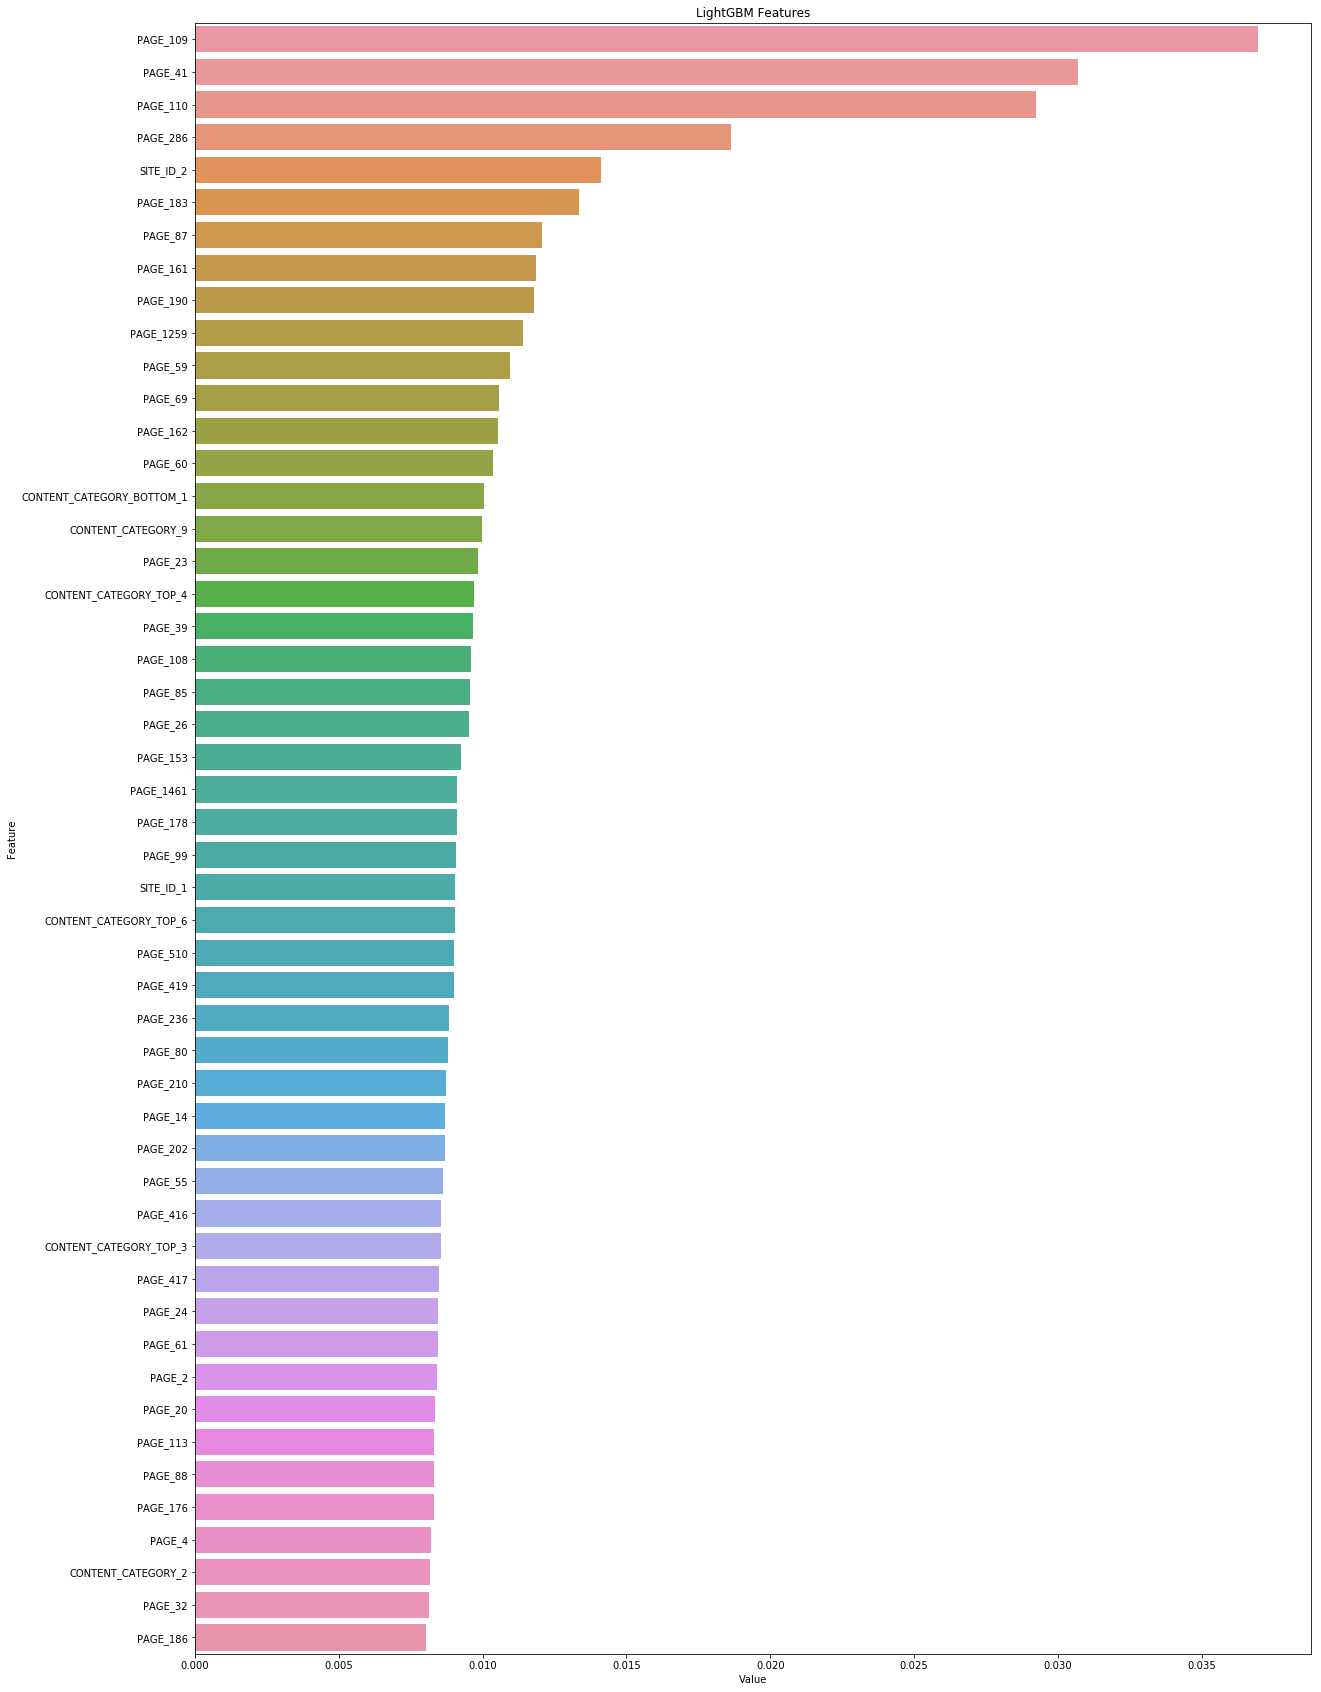

In [100]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 30))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(50))
plt.title('LightGBM Features')
plt.show()

In [33]:
from sklearn.model_selection import learning_curve

In [35]:
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                               X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=np.linspace(0.01, 1.0, 2))

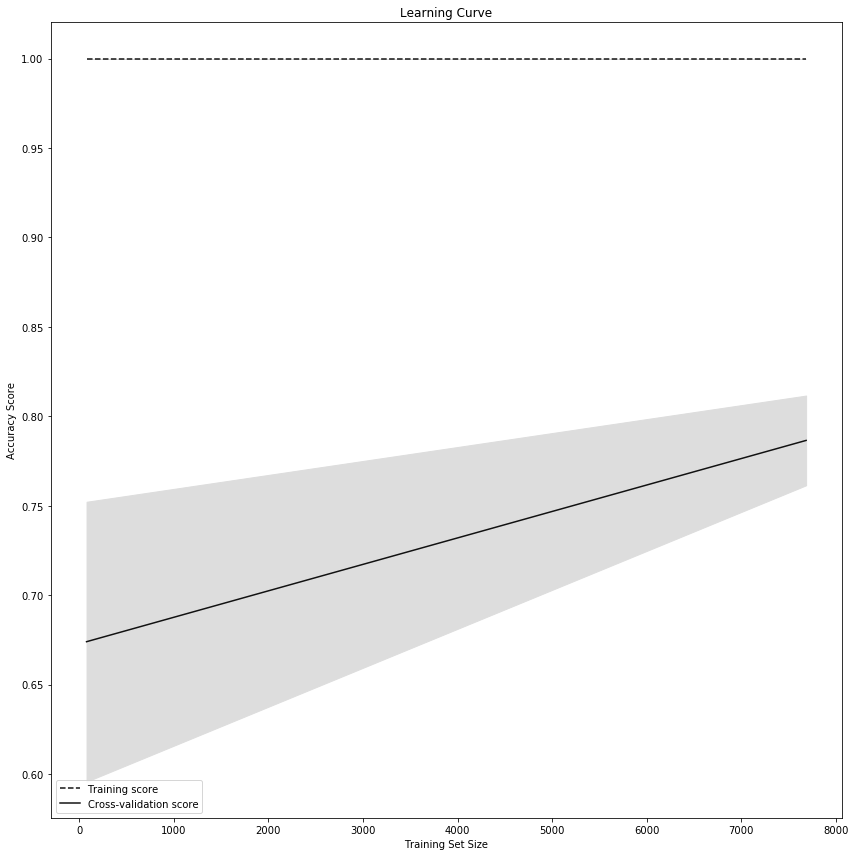

NameError: name 'Snippet_188' is not defined

In [36]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.subplots(figsize=(12,12))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

### Tune hyperparameter

In [88]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [90]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [91]:
xgb = xgb.XGBClassifier(learning_rate=0.1, n_estimators=56, objective='binary:logistic', nthread=1, random_state=42)


In [92]:
folds = 5
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='roc_auc', 
                                   n_jobs=4, 
                                   cv=skf.split(X_train,y_train), 
                                   verbose=3, 
                                   random_state=1001)

In [93]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x1a21b1e0c0>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=56,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logistic',
                                           ran...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True,
                                           subsample=1),
                   iid='warn', n_iter=10, n

In [94]:
random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 2,
 'colsample_bytree': 0.8}

In [95]:
random_search.best_score_

0.8525890699092249

### XGB

In [79]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()


def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None,feature_names=None):
    
    params = {}
    params["objective"] = "binary:logistic"
    params['eval_metric'] = 'auc'
    params["eta"] = 0.1
    # . params["min_child_weight"] = 1 
    params["subsample"] = 0.8
    params["colsample_bytree"] = 0.8
    params["silent"] = 1
    params["max_depth"] = 2
    params["seed"] = 42
    # params["gamma"] = 0.5
    num_rounds = 10000

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    xg_test = xgb.DMatrix(test_X2)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [(xgtrain, 'train'), (xgtest, 'test')]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)


    if feature_names:
        create_feature_map(feature_names)
        importance = model.get_fscore(fmap='xgb.fmap')
        importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
        imp_df = pd.DataFrame(importance, columns=['feature', 'fscore'])
        imp_df['fscore'] = imp_df['fscore'] / imp_df['fscore'].sum()
        imp_df.to_csv("imp_feat.txt", index=False)
    
    pred_test_y = model.predict(xgtest, ntree_limit=model.best_iteration)
    pred_test_y2 = model.predict(xg_test, ntree_limit=model.best_iteration)
    print('done')
    loss= 0
    if test_y is not None:
        loss = roc_auc_score(test_y, pred_test_y)
        print('roc:', loss)
        return pred_test_y, loss, pred_test_y2
    else:
        return pred_test_y, pred_test_y2

In [80]:
from sklearn.model_selection import KFold, StratifiedKFold

In [82]:
roc_auc_score(y_train, pred_val_full)

0.8283140954341335

In [84]:
print ("Model building..")

for model_name in ["XGB1"]:

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2018)
    cv_scores = []
    pred_test_full = 0
    pred_val_full = np.zeros(X_train.shape[0])
    for dev_index, val_index in kf.split(X_train, y_train):
        dev_X, val_X = X_train.iloc[dev_index,:], X_train.iloc[val_index,:]
        dev_y, val_y = y_train[dev_index], y_train[val_index]

        if model_name == "XGB1":
            pred_val, loss, pred_test = runXGB(train_X=dev_X, 
                                               train_y=dev_y, 
                                               test_X=val_X, 
                                               test_y=val_y, 
                                               test_X2=X_test, 
                                               feature_names=dev_X.columns.tolist())
        elif model_name == "LGB1":
            pred_val, loss, pred_test = runLGB(dev_X, dev_y, val_X, val_y, X_test, rounds=5000, dep=8)
        pred_val_full[val_index] = pred_val
        pred_test_full = pred_test_full + pred_test
        cv_scores.append(loss)
        print ('cv scores:', cv_scores)
    pred_test_full /= 5.
    print ('roc:', roc_auc_score(y_train, pred_val_full))

Model building..


/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.740714	test-auc:0.743307
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[1]	train-auc:0.793092	test-auc:0.789722
[2]	train-auc:0.829021	test-auc:0.81654
[3]	train-auc:0.82917	test-auc:0.819886
[4]	train-auc:0.83859	test-auc:0.823518
[5]	train-auc:0.839444	test-auc:0.823774
[6]	train-auc:0.840979	test-auc:0.822247
[7]	train-auc:0.843825	test-auc:0.827203
[8]	train-auc:0.845592	test-auc:0.828939
[9]	train-auc:0.84592	test-auc:0.831266
[10]	train-auc:0.857205	test-auc:0.83268
[11]	train-auc:0.860388	test-auc:0.838912
[12]	train-auc:0.859352	test-auc:0.838692
[13]	train-auc:0.860686	test-auc:0.845305
[14]	train-auc:0.86131	test-auc:0.845286
[15]	train-auc:0.862507	test-auc:0.846404
[16]	train-auc:0.865021	test-auc:0.849102
[17]	train-auc:0.865811	test-auc:0.849585
[18]	train-auc:0.867416	test-auc:0.8491
[19]	train-auc:0.868552	test-auc:0.848185
[20]	train-auc:0.868819	test-auc:0.84

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.771462	test-auc:0.747164
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[1]	train-auc:0.77548	test-auc:0.749709
[2]	train-auc:0.780923	test-auc:0.750437
[3]	train-auc:0.83063	test-auc:0.793533
[4]	train-auc:0.831907	test-auc:0.795175
[5]	train-auc:0.845757	test-auc:0.808377
[6]	train-auc:0.865897	test-auc:0.82987
[7]	train-auc:0.866314	test-auc:0.828708
[8]	train-auc:0.865944	test-auc:0.828395
[9]	train-auc:0.866464	test-auc:0.828103
[10]	train-auc:0.865781	test-auc:0.827247
[11]	train-auc:0.866509	test-auc:0.827154
[12]	train-auc:0.866962	test-auc:0.827663
[13]	train-auc:0.869056	test-auc:0.827317
[14]	train-auc:0.869951	test-auc:0.828357
[15]	train-auc:0.869192	test-auc:0.828529
[16]	train-auc:0.869388	test-auc:0.827964
[17]	train-auc:0.87111	test-auc:0.829876
[18]	train-auc:0.872061	test-auc:0.831278
[19]	train-auc:0.87365	test-auc:0.832886
[20]	train-auc:0.874138	test-auc:0

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.718858	test-auc:0.701557
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[1]	train-auc:0.805756	test-auc:0.791964
[2]	train-auc:0.80723	test-auc:0.789974
[3]	train-auc:0.810683	test-auc:0.791801
[4]	train-auc:0.809856	test-auc:0.791075
[5]	train-auc:0.810421	test-auc:0.799159
[6]	train-auc:0.811164	test-auc:0.806008
[7]	train-auc:0.838611	test-auc:0.833947
[8]	train-auc:0.840492	test-auc:0.833724
[9]	train-auc:0.841031	test-auc:0.833656
[10]	train-auc:0.843167	test-auc:0.833503
[11]	train-auc:0.843509	test-auc:0.833689
[12]	train-auc:0.854065	test-auc:0.853552
[13]	train-auc:0.8539	test-auc:0.853521
[14]	train-auc:0.853993	test-auc:0.853971
[15]	train-auc:0.851979	test-auc:0.858505
[16]	train-auc:0.860392	test-auc:0.858009
[17]	train-auc:0.860842	test-auc:0.857652
[18]	train-auc:0.86215	test-auc:0.856644
[19]	train-auc:0.861983	test-auc:0.855607
[20]	train-auc:0.862817	test-auc:

### LGB

In [29]:
import lightgbm as lgb
from sklearn import preprocessing, metrics, ensemble, neighbors, linear_model, tree, model_selection
from sklearn.model_selection import KFold, StratifiedKFold

In [34]:
def runLGB(train_X, train_y, test_X, test_y=None, test_X2=None, feature_names=None, seed_val=0, rounds=500, dep=6, eta=0.05):
	params = {}
	params["objective"] = "binary"
	params['metric'] = 'auc'
	params["max_depth"] = dep
	params["min_data_in_leaf"] = 20
	params["learning_rate"] = eta
	params["bagging_fraction"] = 0.8
	params["feature_fraction"] = 0.8
	params["bagging_freq"] = 5
	params["bagging_seed"] = seed_val
	params["verbosity"] = 0
	num_rounds = rounds

	plst = list(params.items())
	lgtrain = lgb.Dataset(train_X, label=train_y)

	if test_y is not None:
		lgtest = lgb.Dataset(test_X, label=test_y)
		model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=100, verbose_eval=20)
	else:
		lgtest = lgb.DMatrix(test_X)
		model = lgb.train(params, lgtrain, num_rounds)

	pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
	pred_test_y2 = model.predict(test_X2, num_iteration=model.best_iteration)

	loss = 0
	if test_y is not None:
		loss = metrics.roc_auc_score(test_y, pred_test_y)
		print (loss)
		return pred_test_y, loss, pred_test_y2
	else:
		return pred_test_y, loss, pred_test_y2

In [171]:
print ("Model building..")

for model_name in ["LGB1"]:

    kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2018)
    cv_scores = []
    pred_test_full = 0
    pred_val_full = np.zeros(X_train.shape[0])
    for dev_index, val_index in kf.split(X_train):
        dev_X, val_X = X_train.iloc[dev_index,:], X_train.iloc[val_index,:]
        dev_y, val_y = y_train[dev_index], y_train[val_index]

        if model_name == "XGB1":
            pred_val, loss, pred_test = runXGB(dev_X, dev_y, val_X, val_y, X_test, rounds=5000, dep=8, feature_names=dev_X.columns.tolist())
        elif model_name == "LGB1":
            pred_val, loss, pred_test = runLGB(dev_X, dev_y, val_X, val_y, X_test, rounds=5000, dep=8)
        pred_val_full[val_index] = pred_val
        pred_test_full = pred_test_full + pred_test
        cv_scores.append(loss)
        print ('cv scores:', cv_scores)
    pred_test_full /= 5.
    print ('roc:', metrics.roc_auc_score(y_train, pred_val_full))

Model building..
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.822282
[40]	valid_0's auc: 0.826048
[60]	valid_0's auc: 0.826306
[80]	valid_0's auc: 0.826656
[100]	valid_0's auc: 0.824796
[120]	valid_0's auc: 0.822485
[140]	valid_0's auc: 0.816789
Early stopping, best iteration is:
[52]	valid_0's auc: 0.83123
0.8312300760720277
cv scores: [0.8312300760720277]
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.842594
[40]	valid_0's auc: 0.844892
[60]	valid_0's auc: 0.840735
[80]	valid_0's auc: 0.841112
[100]	valid_0's auc: 0.842307
[120]	valid_0's auc: 0.840006
Early stopping, best iteration is:
[28]	valid_0's auc: 0.851708
0.8517077543702376
cv scores: [0.8312300760720277, 0.8517077543702376]
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.845353
[40]	valid_0's auc: 0.848135
[60]	valid_0's auc: 0.855476
[80]	valid_0's auc: 0.855558
[100]	valid_0's auc: 0.853304
[120]	valid_0's a

In [ ]:
out_df = pd.DataFrame({"UCIC_ID":test_id})
out_df["Responders"] = pred_test_full
out_df.to_csv("./meta_models/test/pred_test_v5_"+model_name+".csv", index=False)

out_df = pd.DataFrame({"UCIC_ID":train_id})
out_df["Responders"] = pred_val_full
out_df.to_csv("./meta_models/val/pred_val_v5_"+model_name+".csv", index=False)

In [84]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import roc_auc_score

In [166]:
fi = []
test_probs = []
i = 0
categorical_features = []
for train_idx, valid_idx in model_selection.KFold(n_splits=3, shuffle=True).split(X_train):
    i += 1
    Xt = X_train.iloc[train_idx]
    yt = y_train.iloc[train_idx]

    Xv = X_train.iloc[valid_idx]
    yv = y_train.iloc[valid_idx]
    
    learner = LGBMClassifier(n_estimators=10000)
    learner.fit(Xt, yt,  early_stopping_rounds=50, eval_metric="auc",
                eval_set=[(Xt, yt), (Xv, yv)])
    
    test_probs.append(pd.Series(learner.predict_proba(X_test)[:, -1],
                                index=X_test.index, name="fold_" + str(i)))
    fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))
    print('*'*100)

test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
test_probs.index.name="USER_ID"
test_probs.name="SCORE"
fi = pd.concat(fi, axis=1).mean(axis=1)

[1]	training's binary_logloss: 0.126145	training's auc: 0.858384	valid_1's binary_logloss: 0.139452	valid_1's auc: 0.719383
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.115389	training's auc: 0.902577	valid_1's binary_logloss: 0.136807	valid_1's auc: 0.791728
[3]	training's binary_logloss: 0.106853	training's auc: 0.913021	valid_1's binary_logloss: 0.134199	valid_1's auc: 0.800686
[4]	training's binary_logloss: 0.0998989	training's auc: 0.927987	valid_1's binary_logloss: 0.132153	valid_1's auc: 0.796186
[5]	training's binary_logloss: 0.0940303	training's auc: 0.934045	valid_1's binary_logloss: 0.130979	valid_1's auc: 0.796161
[6]	training's binary_logloss: 0.0890072	training's auc: 0.940559	valid_1's binary_logloss: 0.129556	valid_1's auc: 0.806731
[7]	training's binary_logloss: 0.0844893	training's auc: 0.944346	valid_1's binary_logloss: 0.128602	valid_1's auc: 0.80852
[8]	training's binary_logloss: 0.0806133	training's auc: 0.949222	v

****************************************************************************************************
[1]	training's binary_logloss: 0.126331	training's auc: 0.86006	valid_1's binary_logloss: 0.141773	valid_1's auc: 0.688795
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.115392	training's auc: 0.894527	valid_1's binary_logloss: 0.138845	valid_1's auc: 0.775107
[3]	training's binary_logloss: 0.107267	training's auc: 0.909139	valid_1's binary_logloss: 0.136317	valid_1's auc: 0.800862
[4]	training's binary_logloss: 0.100222	training's auc: 0.919017	valid_1's binary_logloss: 0.134387	valid_1's auc: 0.802316
[5]	training's binary_logloss: 0.0939713	training's auc: 0.934957	valid_1's binary_logloss: 0.133776	valid_1's auc: 0.803204
[6]	training's binary_logloss: 0.0887733	training's auc: 0.942664	valid_1's binary_logloss: 0.132936	valid_1's auc: 0.802072
[7]	training's binary_logloss: 0.0842822	training's auc: 0.948386	valid_1's binary_logloss: 

[69]	training's binary_logloss: 0.0103586	training's auc: 1	valid_1's binary_logloss: 0.142621	valid_1's auc: 0.83611
[70]	training's binary_logloss: 0.0100796	training's auc: 1	valid_1's binary_logloss: 0.143238	valid_1's auc: 0.836141
[71]	training's binary_logloss: 0.00982507	training's auc: 1	valid_1's binary_logloss: 0.143421	valid_1's auc: 0.837332
[72]	training's binary_logloss: 0.00954214	training's auc: 1	valid_1's binary_logloss: 0.143905	valid_1's auc: 0.837463
Early stopping, best iteration is:
[22]	training's binary_logloss: 0.0451167	training's auc: 0.999246	valid_1's binary_logloss: 0.125816	valid_1's auc: 0.840019
****************************************************************************************************
[1]	training's binary_logloss: 0.126282	training's auc: 0.848134	valid_1's binary_logloss: 0.144133	valid_1's auc: 0.75482
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.114914	training's auc: 0.871369	valid_1's b

[67]	training's binary_logloss: 0.0108488	training's auc: 1	valid_1's binary_logloss: 0.145316	valid_1's auc: 0.833615
[68]	training's binary_logloss: 0.0105621	training's auc: 1	valid_1's binary_logloss: 0.146085	valid_1's auc: 0.832956
Early stopping, best iteration is:
[18]	training's binary_logloss: 0.051504	training's auc: 0.996457	valid_1's binary_logloss: 0.127456	valid_1's auc: 0.850324
****************************************************************************************************


In [167]:
test_probs.shape

(11676,)

In [168]:
X_train.shape

(11529, 476)

In [169]:
test_probs.to_csv("benchmark_03-09-2019_remove_constant_columns_098.zip", header=True, compression="zip")

In [153]:
test_probs.shape

(11676,)

* With 0.98 gives 0.839999 score, better than 0.99 but still lower than vanilla baseline

### Using LGB CV

In [207]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [224]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'max_depth': sp_randint(1, 50),
            }


In [226]:
clf = LGBMClassifier(random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [227]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 34.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            metric='None', min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=5000, n_jobs=4,
                                            num_leaves=31, objective=None,
                                            random_state=314, reg_...
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen 

In [229]:
gs.best_params_

{'colsample_bytree': 0.6519926489344068,
 'max_depth': 4,
 'min_child_samples': 107,
 'min_child_weight': 0.1,
 'num_leaves': 17,
 'reg_alpha': 10,
 'reg_lambda': 50,
 'subsample': 0.7532869922328251}

In [231]:
params = gs.best_params_

In [230]:
gs.best_score_

0.8511421844197116

### Train again with best params

In [232]:
fi = []
test_probs = []
i = 0
categorical_features = []
for train_idx, valid_idx in model_selection.KFold(n_splits=3, shuffle=True).split(X_train):
    i += 1
    Xt = X_train.iloc[train_idx]
    yt = y_train.iloc[train_idx]

    Xv = X_train.iloc[valid_idx]
    yv = y_train.iloc[valid_idx]
    
    learner = LGBMClassifier(n_estimators=10000, **params)
    learner.fit(Xt, yt,  early_stopping_rounds=50, eval_metric="auc",
                eval_set=[(Xt, yt), (Xv, yv)])
    
    test_probs.append(pd.Series(learner.predict_proba(X_test)[:, -1],
                                index=X_test.index, name="fold_" + str(i)))
    fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))
    print('*'*100)

test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
test_probs.index.name="USER_ID"
test_probs.name="SCORE"
fi = pd.concat(fi, axis=1).mean(axis=1)

[1]	training's binary_logloss: 0.149781	training's auc: 0.826577	valid_1's binary_logloss: 0.132772	valid_1's auc: 0.81292
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.146805	training's auc: 0.859602	valid_1's binary_logloss: 0.130297	valid_1's auc: 0.840082
[3]	training's binary_logloss: 0.143917	training's auc: 0.866112	valid_1's binary_logloss: 0.12801	valid_1's auc: 0.840966
[4]	training's binary_logloss: 0.141578	training's auc: 0.870236	valid_1's binary_logloss: 0.126252	valid_1's auc: 0.842101
[5]	training's binary_logloss: 0.139263	training's auc: 0.870831	valid_1's binary_logloss: 0.124483	valid_1's auc: 0.842587
[6]	training's binary_logloss: 0.137152	training's auc: 0.875176	valid_1's binary_logloss: 0.122842	valid_1's auc: 0.843532
[7]	training's binary_logloss: 0.13532	training's auc: 0.875573	valid_1's binary_logloss: 0.121327	valid_1's auc: 0.843251
[8]	training's binary_logloss: 0.13372	training's auc: 0.879008	valid_1's

[93]	training's binary_logloss: 0.101092	training's auc: 0.924003	valid_1's binary_logloss: 0.1078	valid_1's auc: 0.859696
[94]	training's binary_logloss: 0.100929	training's auc: 0.924215	valid_1's binary_logloss: 0.107856	valid_1's auc: 0.859242
[95]	training's binary_logloss: 0.100804	training's auc: 0.924534	valid_1's binary_logloss: 0.107849	valid_1's auc: 0.859349
[96]	training's binary_logloss: 0.100617	training's auc: 0.924908	valid_1's binary_logloss: 0.107863	valid_1's auc: 0.859314
[97]	training's binary_logloss: 0.100478	training's auc: 0.925114	valid_1's binary_logloss: 0.107847	valid_1's auc: 0.85927
[98]	training's binary_logloss: 0.100336	training's auc: 0.925416	valid_1's binary_logloss: 0.107899	valid_1's auc: 0.858909
[99]	training's binary_logloss: 0.100166	training's auc: 0.925806	valid_1's binary_logloss: 0.107952	valid_1's auc: 0.858893
[100]	training's binary_logloss: 0.100055	training's auc: 0.926035	valid_1's binary_logloss: 0.107918	valid_1's auc: 0.859055
[1

[42]	training's binary_logloss: 0.110243	training's auc: 0.905872	valid_1's binary_logloss: 0.111826	valid_1's auc: 0.85028
[43]	training's binary_logloss: 0.109944	training's auc: 0.906747	valid_1's binary_logloss: 0.111653	valid_1's auc: 0.850968
[44]	training's binary_logloss: 0.109642	training's auc: 0.907582	valid_1's binary_logloss: 0.111615	valid_1's auc: 0.850554
[45]	training's binary_logloss: 0.109385	training's auc: 0.908082	valid_1's binary_logloss: 0.111502	valid_1's auc: 0.850104
[46]	training's binary_logloss: 0.109117	training's auc: 0.908363	valid_1's binary_logloss: 0.111351	valid_1's auc: 0.850646
[47]	training's binary_logloss: 0.108909	training's auc: 0.908449	valid_1's binary_logloss: 0.111322	valid_1's auc: 0.850863
[48]	training's binary_logloss: 0.108689	training's auc: 0.908672	valid_1's binary_logloss: 0.111322	valid_1's auc: 0.85065
[49]	training's binary_logloss: 0.108464	training's auc: 0.909119	valid_1's binary_logloss: 0.111233	valid_1's auc: 0.850646
[5

****************************************************************************************************
[1]	training's binary_logloss: 0.134156	training's auc: 0.832794	valid_1's binary_logloss: 0.165241	valid_1's auc: 0.802798
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.131528	training's auc: 0.840816	valid_1's binary_logloss: 0.162139	valid_1's auc: 0.82194
[3]	training's binary_logloss: 0.129098	training's auc: 0.849372	valid_1's binary_logloss: 0.159283	valid_1's auc: 0.832531
[4]	training's binary_logloss: 0.127203	training's auc: 0.865129	valid_1's binary_logloss: 0.157139	valid_1's auc: 0.846971
[5]	training's binary_logloss: 0.125284	training's auc: 0.86824	valid_1's binary_logloss: 0.15515	valid_1's auc: 0.848744
[6]	training's binary_logloss: 0.123443	training's auc: 0.874456	valid_1's binary_logloss: 0.153141	valid_1's auc: 0.847642
[7]	training's binary_logloss: 0.121868	training's auc: 0.874997	valid_1's binary_logloss: 0.151

****************************************************************************************************


In [233]:
test_probs.to_csv("benchmark_04-09-2019_tuned_lgb.zip", header=True, compression="zip")

### Using XGB

In [174]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [175]:
train = X_train.copy()
test = X_test.copy()
target = y_train.copy()

In [176]:
XX_train, XX_valid, yy_train, yy_valid = train_test_split(train, target, test_size = 0.2, stratify = target)




In [177]:
clf = xgb.XGBClassifier(max_depth = 4,
                n_estimators=10000,
                learning_rate=0.1, 
                # nthread=4,
                subsample=0.8,
                colsample_bytree=0.8,
                #min_child_weight = 3,
                # scale_pos_weight = ratio,
                #reg_alpha=50,
                #reg_lambda = 50,
                seed=42)

In [178]:
clf.fit(XX_train, yy_train, early_stopping_rounds=50, eval_metric="auc",
        eval_set=[(XX_train, yy_train), (XX_valid, yy_valid)])

[0]	validation_0-auc:0.818687	validation_1-auc:0.787636
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.826944	validation_1-auc:0.787118
[2]	validation_0-auc:0.844102	validation_1-auc:0.788626
[3]	validation_0-auc:0.859109	validation_1-auc:0.793387
[4]	validation_0-auc:0.884856	validation_1-auc:0.804994
[5]	validation_0-auc:0.886563	validation_1-auc:0.806786
[6]	validation_0-auc:0.89115	validation_1-auc:0.803584
[7]	validation_0-auc:0.893021	validation_1-auc:0.803023
[8]	validation_0-auc:0.899585	validation_1-auc:0.820018
[9]	validation_0-auc:0.899996	validation_1-auc:0.820392
[10]	validation_0-auc:0.902817	validation_1-auc:0.819983
[11]	validation_0-auc:0.909219	validation_1-auc:0.829231
[12]	validation_0-auc:0.912691	validation_1-auc:0.830154
[13]	validation_0-auc:0.91381	validation_1-auc:0.830514
[14]	validation_0-auc:0.914642	validation_1-auc:0.829668


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.8, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=10000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
              subsample=0.8)

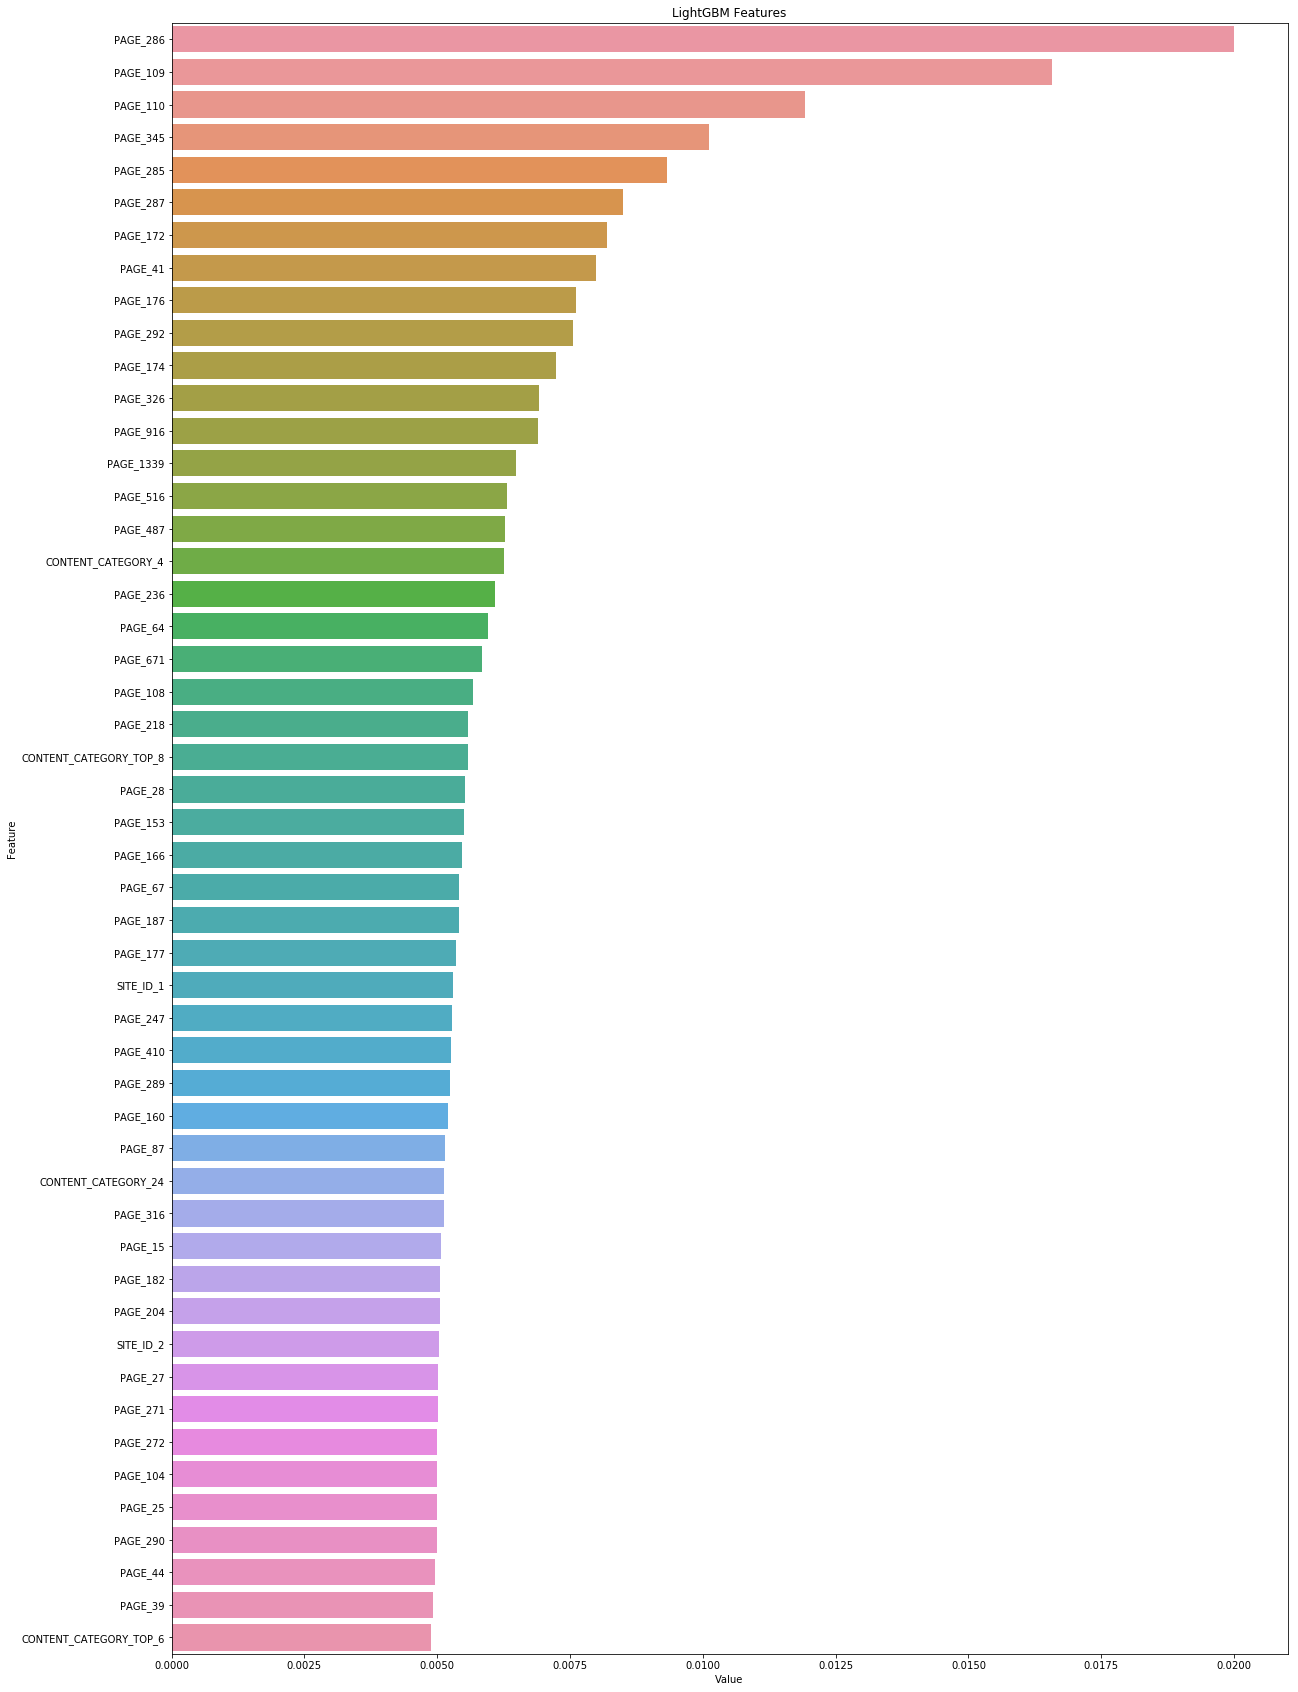

In [183]:
# model with replies features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 30))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(50))
plt.title('LightGBM Features')
plt.show()

In [37]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [39]:
def score(params):
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    bst = xgb.train(params, 
                      dtrain, 
                      num_round,
                      evals=watchlist,
                      verbose_eval=False)
    predictions = bst.predict(dvalid, ntree_limit=bst.best_iteration)
    roc = roc_auc_score(y_valid, np.array(predictions))
    print(roc)
    return {'loss': roc, 'status': STATUS_OK}

In [40]:
def optimize(evals, cores, trials, optimizer=tpe.suggest, random_state=42):
    space = {
        'n_estimators': hp.quniform('n_estimators', 100, 600, 1),
        'eta': hp.quniform('eta', 0.025, 0.25, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.quniform('subsample', 0.7, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.7, 1, 0.05),
        'alpha' :  hp.quniform('alpha', 0, 10, 1),
        'lambda': hp.quniform('lambda', 1, 2, 0.1),
        'nthread': cores,
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'seed': random_state
    }
    best = fmin(score, space, algo=tpe.suggest, max_evals=evals, trials = trials)
    return best

In [43]:
trials = Trials()
cores = 8
n= 10
best_param = optimize(evals = n,
                      optimizer=tpe.suggest,
                      cores = cores,
                      trials = trials)

0.8020687645687645                                  
 10%|█         | 1/10 [01:37<14:41, 97.91s/it, best loss: 0.8020687645687645]

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



0.8221853146853146                                                           
 20%|██        | 2/10 [02:53<12:09, 91.17s/it, best loss: 0.8020687645687645]

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



0.8257983682983683                                                           
 30%|███       | 3/10 [07:44<17:39, 151.29s/it, best loss: 0.8020687645687645]

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



0.8397843822843822                                                            
 40%|████      | 4/10 [09:50<14:21, 143.50s/it, best loss: 0.8020687645687645]

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



0.8381002331002331                                                            
 50%|█████     | 5/10 [15:14<16:28, 197.69s/it, best loss: 0.8020687645687645]

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



0.7970920745920745                                                            
 60%|██████    | 6/10 [18:06<12:39, 189.97s/it, best loss: 0.7970920745920745]

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



0.839965034965035                                                             
 70%|███████   | 7/10 [19:11<07:37, 152.44s/it, best loss: 0.7970920745920745]

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



0.7940209790209791                                                            
 80%|████████  | 8/10 [21:04<04:41, 140.79s/it, best loss: 0.7940209790209791]

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



0.8001165501165503                                                            
 90%|█████████ | 9/10 [23:49<02:27, 147.95s/it, best loss: 0.7940209790209791]

/anaconda3/envs/pyenv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



0.8047552447552447                                                            
100%|██████████| 10/10 [25:20<00:00, 152.09s/it, best loss: 0.7940209790209791]


In [44]:
best_param

{'alpha': 0.0,
 'colsample_bytree': 0.7000000000000001,
 'eta': 0.2,
 'gamma': 0.9,
 'lambda': 1.0,
 'max_depth': 6,
 'min_child_weight': 8.0,
 'n_estimators': 231.0,
 'subsample': 0.75}

### Logistic Regression


In [199]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC

In [200]:
lr = LinearSVC()

In [191]:
XX_train, XX_valid, yy_train, yy_valid = train_test_split(train, target, test_size = 0.2, stratify = target)

In [201]:
lr.fit(XX_train, yy_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [203]:
vals = lr.predict(XX_valid)

In [205]:
metrics.roc_auc_score(yy_valid, vals)

0.5

In [190]:
print ("Model building..")

for model_name in ["logreg"]:

    kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2018)
    cv_scores = []
    pred_test_full = 0
    pred_val_full = np.zeros(X_train.shape[0])
    for dev_index, val_index in kf.split(X_train):
        dev_X, val_X = X_train.iloc[dev_index,:], X_train.iloc[val_index,:]
        dev_y, val_y = y_train[dev_index], y_train[val_index]

        if model_name == "logreg":
            lr.fit(dev_X, dev_y)
            pred_val = lr.predict(val_X)
            pred_test = lr.predict(X_test)
            loss = metrics.roc_auc_score(val_y, pred_val)
        
        pred_val_full[val_index] = pred_val
        pred_test_full = pred_test_full + pred_test
        cv_scores.append(loss)
        print ('cv scores:', cv_scores)
    pred_test_full /= 5.
    print ('roc:', metrics.roc_auc_score(y_train, pred_val_full))

Model building..


/anaconda3/envs/pyenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


cv scores: [0.5]
cv scores: [0.5, 0.5]


/anaconda3/envs/pyenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/pyenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


cv scores: [0.5, 0.5, 0.5]
cv scores: [0.5, 0.5, 0.5, 0.5]


/anaconda3/envs/pyenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/pyenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


cv scores: [0.5, 0.5, 0.5, 0.5, 0.5]


TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'l') according to the casting rule ''same_kind''